In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
df_sp = pd.read_csv('C:/Users/MazaherGhorbani/Desktop/Python/Trainings/Plotting/StudentsPerformance.csv')
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
df_sp['TotalScore'] = df_sp['math score'] + df_sp['reading score'] + df_sp['writing score']
df_sp['MeanScore'] = df_sp['TotalScore']/3
df_sp['Placing'] = df_sp['MeanScore'].apply(lambda x: 'A*' if x > 90 else 'A' if x > 80 else 'B' if x > 70 else 'C' if x > 60
                                           else 'D or Lower')
Placing_order = ['A*', 'A', 'B', 'C', 'D or Lower']
df_sp['Par_ed_num'] = df_sp['parental level of education'].map({'some high school':0, 'high school':1, 'some college':2,
                                                                "associate's degree":3,"bachelor's degree":4,"master's degree":5})
# df_sp['parental level of education'].unique()
df_sp['Lunch_dummy'] = df_sp['lunch'].map({'standard':0, 'free/reduced':1})
df_sp['Test_Prep_dummy'] = df_sp['test preparation course'].apply(lambda x: 1 if x == 'completed' else 0)
df_sp['Gender_dummy'] = df_sp['gender'].apply(lambda x: 1 if x == 'male' else 0)

def flag_df(df_sp):

    if (df_sp['lunch'] == 'free/reduced') and (df_sp['test preparation course'] == 'none'):
        return 1
    else:
        return 0
    
def flag2_df(df_sp):

    if (df_sp['lunch'] == 'free/reduced') and (df_sp['test preparation course'] == 'none') and (df_sp['Par_ed_num'] == 0):
        return 1
    else:
        return 0
    
#variable to show those students on free lunches and have no test prep course
df_sp['free_no_course'] = df_sp.apply(flag_df, axis = 1)

df_sp['pare_ed_free_no_course'] = df_sp.apply(flag2_df, axis = 1)
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,TotalScore,MeanScore,Placing,Par_ed_num,Lunch_dummy,Test_Prep_dummy,Gender_dummy,free_no_course,pare_ed_free_no_course
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,B,4,0,0,0,0,0
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,A,2,0,1,0,0,0
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A*,5,0,0,0,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,D or Lower,3,1,0,1,1,0
4,male,group C,some college,standard,none,76,78,75,229,76.333333,B,2,0,0,1,0,0


In [43]:
eth_df = pd.DataFrame(df_sp['race/ethnicity'].value_counts())
eth_df.columns=['count']
eth_df['Percentage'] = eth_df['count'].apply(lambda x: x/sum(eth_df['count'])*100)
eth_df = pd.DataFrame(eth_df.unstack()).reset_index(drop=False)
eth_df = eth_df.iloc[5:11, 1:3]
eth_df.columns = ["Group", "Percentage"]
eth_df = eth_df.reset_index(drop=True)
eth_df = eth_df.set_index('Group')
eth_df = eth_df.T
eth_df

Group,group C,group D,group B,group E,group A
Percentage,31.9,26.2,19.0,14.0,8.9


In [44]:
df_sp['count']=1

# splitting data into continents
a_df = df_sp[df_sp["race/ethnicity"]=="group A"]
b_df = df_sp[df_sp["race/ethnicity"]=="group B"]
c_df = df_sp[df_sp["race/ethnicity"]=="group C"]
d_df = df_sp[df_sp["race/ethnicity"]=="group D"]
e_df = df_sp[df_sp["race/ethnicity"]=="group E"]

a_count_df = pd.DataFrame(a_df["race/ethnicity"].value_counts())
a_count_df = a_count_df.reset_index(drop=False)
a_count_df.columns = ["Group","Count"]


b_count_df = pd.DataFrame(b_df["race/ethnicity"].value_counts())
b_count_df = b_count_df.reset_index(drop=False)
b_count_df.columns = ["Group","Count"]

par_ed_order = ['some high school','high school','some college',"associate's degree","bachelor's degree", "master's degree"]


a_ed = a_df['parental level of education'].value_counts()[par_ed_order]
b_ed = b_df['parental level of education'].value_counts()[par_ed_order]
c_ed = c_df['parental level of education'].value_counts()[par_ed_order]
d_ed = d_df['parental level of education'].value_counts()[par_ed_order]
e_ed = e_df['parental level of education'].value_counts()[par_ed_order]

# Gender

x=df_sp.groupby(['gender'])['gender'].count()
y=len(df_sp)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T
mf_ratio

gender,female,male
gender,0.52,0.48


Text(0.0, 1.2, 'My palette for this project')

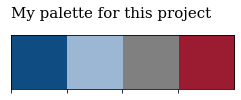

In [45]:
sns.palplot(['#0f4c81', '#9bb7d4', 'gray','#9b1b30'])
plt.title("My palette for this project",loc='left',fontfamily='serif',fontsize=15,y=1.2)

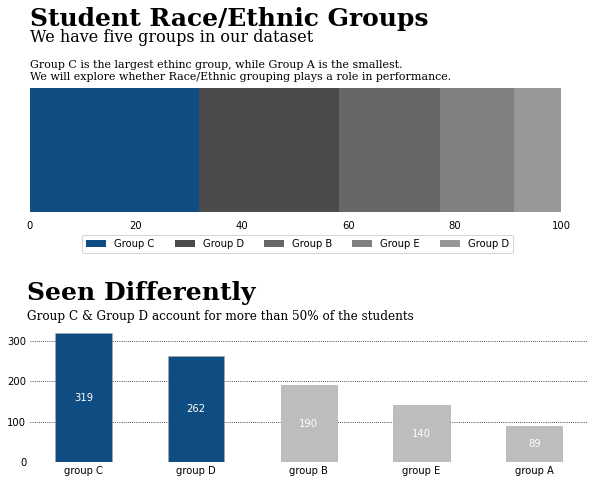

In [46]:
import matplotlib
fig = plt.figure(figsize=(10,16))
gs = fig.add_gridspec(4,2)
gs.update(wspace=0, hspace=0.8)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0:2])


ax0.barh(eth_df.index, eth_df['group C'], color="#0f4c81", zorder=3, label="Group C")
ax0.barh(eth_df.index, eth_df['group D'], left=eth_df['group C'], color="#4b4b4c", zorder=3, label="Group D")
ax0.barh(eth_df.index, eth_df['group B'], left=eth_df['group C'] + eth_df['group D'], color="#676767", zorder=3,
            label="Group B")
ax0.barh(eth_df.index, eth_df['group E'], left=eth_df['group C'] + eth_df['group D'] + eth_df['group B'],
            color="#808080", zorder=3, label="Group E")
ax0.barh(eth_df.index, eth_df['group A'], left=eth_df['group C'] + eth_df['group D'] + eth_df['group B'] +
         eth_df['group E'],
            color="#989898", zorder=3, label="Group D")

ax0.text(0, 0.8, 'Student Race/Ethnic Groups', fontsize=25, fontfamily='serif', fontweight='bold')
ax0.text(0, 0.7, 'We have five groups in our dataset', fontsize=16, fontfamily='serif', fontweight='light')
ax0.text(0, 0.53, 
         'Group C is the largest ethinc group, while Group A is the smallest.', 
         fontsize=11, 
         fontweight='light', 
         fontfamily='serif')

ax0.text(0, 0.45, 
         'We will explore whether Race/Ethnic grouping plays a role in performance.', 
         fontsize=11, 
         fontweight='light', 
         fontfamily='serif')
for i in ['left', 'right', 'top', 'bottom']:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    
ethnicity_order = ['group A','group B','group C','group D', 'group E']
ethnicity = df_sp['race/ethnicity'].value_counts()

color_map = ['#bdbdbd' for i in range(6)]
color_map[0] = color_map[1] = '#0f4c81'

ax1.bar(ethnicity.index, ethnicity, color=color_map, edgecolor='darkgrey', width=0.5, linewidth=0.6)
ax1.grid(axis='y', linestyle=':', color='black')
ax1.set_axisbelow(True)

ax1.text(-0.5, 400, 'Seen Differently', fontfamily='serif', fontsize=25, fontweight='bold')
ax1.text(-0.5, 350, 'Group C & Group D account for more than 50% of the students', fontfamily='serif',
         fontsize=12, fontweight='light')

for i in ethnicity.index:
    ax1.annotate(f"{ethnicity[i]}", xy=(i, ethnicity[i]/2), ha='center', va='center', color='w')

ax0.legend(loc='lower center', ncol=6, bbox_to_anchor=(0.48, -0.3))
ax0.set_yticks([])
ax0.tick_params(axis=u'both', which=u'both', length=0)
ax1.tick_params(axis=u'both', which=u'both', length=0)

In [47]:
x1 = df_sp.groupby(['race/ethnicity'])['gender'].value_counts().unstack()
x1['tot'] = x1['female'] + x1['male']
x1['PF'] = (x1.female/x1.tot).round(2)
x1['PM'] = (x1.male/x1.tot).round(2)
x1

gender,female,male,tot,PF,PM
race/ethnicity,,,,,
group A,36,53,89,0.40,0.60
group B,104,86,190,0.55,0.45
group C,180,139,319,0.56,0.44
group D,129,133,262,0.49,0.51
group E,69,71,140,0.49,0.51


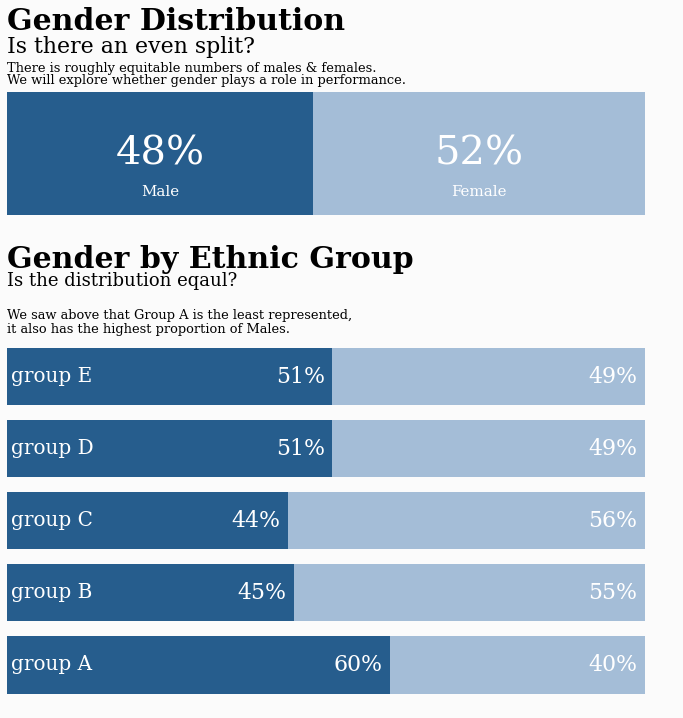

In [48]:
fig = plt.figure(figsize=(12,16))
gs = fig.add_gridspec(4,2)
gs.update(wspace=0, hspace=0.8)

ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[1:3, 0:2])

ax1.barh(mf_ratio.index, mf_ratio.male, color = '#0f4c81', alpha=0.9, label='Male')
ax1.barh(mf_ratio.index, mf_ratio.female, left=mf_ratio.male, color = '#9bb7d4', alpha=0.9, label='Female')

for i in mf_ratio.index:
    ax1.annotate(f"{int(mf_ratio['male'][i]*100)}%", xy=(mf_ratio['male'][i]/2, i),
                fontfamily='serif', fontsize=40, va='center', ha='center', color='white')
    ax1.annotate(f"{int(mf_ratio['female'][i]*100)}%", xy=(mf_ratio['male'][i]+mf_ratio['female'][i]/2, i),
                fontfamily='serif', fontsize=40, va='center', ha='center', color='white')
    ax1.annotate('Male', xy=(mf_ratio['male'][i]/2, -0.25),
                fontfamily='serif', fontsize=15, va='center', ha='center', color='white')
    ax1.annotate('Female', xy=(mf_ratio['male'][i]+mf_ratio['female'][i]/2, -0.25),
                fontfamily='serif', fontsize=15, va='center', ha='center', color='white')

    
ax2.barh(x1.index, x1.PM, color = '#0f4c81', alpha=0.9)
ax2.barh(x1.index, x1.PF, left=x1.PM, color = '#9bb7d4', alpha=0.9)

for i in x1.index:
    ax2.annotate(f"{int(x1['PM'][i]*100)}%", xy=(x1['PM'][i]-0.05, i),
                fontfamily='serif', fontsize=22, va='center', ha='center', color='white')
    ax2.annotate(f"{int(x1['PF'][i]*100)}%", xy=(x1['PM'][i]+x1['PF'][i]-0.05, i),
                fontfamily='serif', fontsize=22, va='center', ha='center', color='white')
    ax2.annotate(i, xy=(0.07, i),
                fontfamily='serif', fontsize=20, va='center', ha='center', color='white')

for i in ['left', 'right', 'top', 'bottom']:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)

ax1.set_yticks([])
ax2.set_yticks([])
ax1.set_xticks([])
ax2.set_xticks([])

ax1.text(0, 0.8, 'Gender Distribution',
        fontfamily='serif', fontsize=30, fontweight='bold', color='black')
ax1.text(0, 0.65, 'Is there an even split?',
        fontfamily='serif', fontsize=22, fontweight='light', color='black')
ax1.text(0, 0.53, 
         'There is roughly equitable numbers of males & females.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

ax1.text(0, 0.45, 
         'We will explore whether gender plays a role in performance.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')
ax2.text(0, 5.5, 
         'Gender by Ethnic Group', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif')

ax2.text(0, 5.25, 
         'Is the distribution eqaul?', 
         fontsize=18, 
         fontweight='light', 
         fontfamily='serif')

ax2.text(0, 4.8, 
         'We saw above that Group A is the least represented,', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

ax2.text(0, 4.6, 
         'it also has the highest proportion of Males.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')


ax2.tick_params(axis=u'both', which=u'both', length=0)

background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color


Text(-20, 0.03, 'We see broadly similar shapes across subjects.')

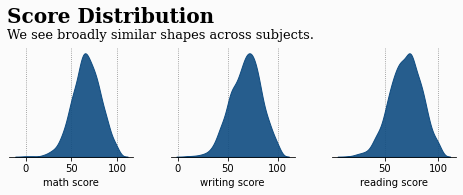

In [49]:
fig = plt.figure(figsize=(8,2))
gs = fig.add_gridspec(1, 3)
gs.update(wspace=0.3, hspace=0)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

fig.patch.set_facecolor('#fbfbfb')
ax0.set_facecolor('#fbfbfb')
ax1.set_facecolor('#fbfbfb')
ax2.set_facecolor('#fbfbfb')

sns.kdeplot(df_sp['math score'], ax=ax0, fill=True, color = '#0f4c81', alpha=0.9)
sns.kdeplot(df_sp['writing score'], ax=ax1, fill=True, color = '#0f4c81', alpha=0.9)
sns.kdeplot(df_sp['reading score'], ax=ax2, fill=True, color = '#0f4c81', alpha=0.9)

for i in ['top', 'left', 'right']:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)

ax0.get_yaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

ax0.grid(axis='x', linestyle=':', color='gray')
ax1.grid(axis='x', linestyle=':', color='gray')
ax2.grid(axis='x', linestyle=':', color='gray')

ax0.set_axisbelow(True)
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

ax0.text(-20, 0.034, 'Score Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.03, 'We see broadly similar shapes across subjects.', fontsize=13, fontweight='light', fontfamily='serif')

Text(0, 0, '')

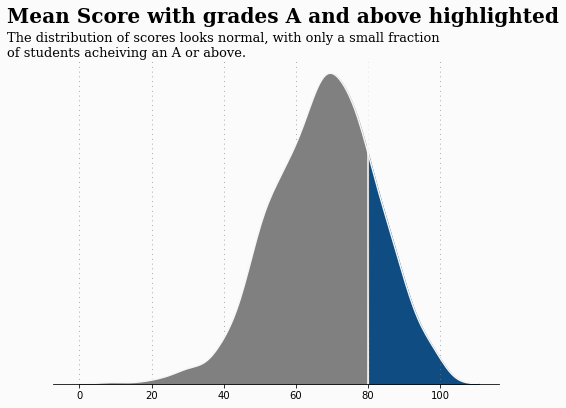

In [50]:
fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(1,1)

fig.patch.set_facecolor('#fbfbfb')
ax.set_facecolor('#fbfbfb')

ax = sns.kdeplot(df_sp['MeanScore'], color = '#f6f6f6')
ax.axvline(x=80, color='#fbfbfb')

# ax = sns.kdeplot(df_sp['MeanScore'],color='#f6f6f6')
ax.set_facecolor(background_color)
kde_x, kde_y = ax.lines[0].get_data()

ax.fill_between(kde_x, kde_y, where=(kde_x<80) & (kde_x>0) , 
                interpolate=True, color='gray')
ax.fill_between(kde_x, kde_y, where=(kde_x>80) & (kde_x<120) , 
                interpolate=True, color='#0f4c81')

for i in ['top', 'left', 'right']:
    ax.spines[i].set_visible(False)
ax.get_yaxis().set_visible(False)
ax.grid(axis='x', linestyle=':', color='gray', dashes=(1,5), zorder=0)

ax.text(-20, 0.032, 'Mean Score with grades A and above highlighted',
        fontsize=20, fontweight='bold', fontfamily='serif')
ax.text(-20, 0.029,
        'The distribution of scores looks normal, with only a small fraction\nof students acheiving an A or above.',
        fontsize=13, fontweight='light', fontfamily='serif')
ax.set_xlabel('',fontsize=15,fontfamily='serif',loc='left')
